# §106, ESV, Clauses

In [4]:
from my_tools import *

In [5]:
from IPython.display import display, HTML

In [31]:
ts = TextShower(
    default=['ref', 'text_full', 'sentence', 'esv_TAMspan', 'esv_TAM']
)

In [32]:
main_semantics = [
    'PAST..IND',     # she wrote
    'PRES.PERF.IND', # he has written
    'PRES..IND',     # she writes
    'PAST.PERF.IND', # she had written
]

# remove cases of 'did not' for now since these are semantically ambiguous
qatal_dfs2 = qatal_dfs[
    (~qatal_dfs.esv_TAMspan.str.match('.*did not.*', na=False))
    & (~qatal_dfs.niv_TAMspan.str.match('.*did not.*', na=False))
]

# make a set of dfs with respective data and prerequisites
esv_df = qatal_dfs2[qatal_dfs2.esv_TAM.isin(main_semantics)]
niv_df = qatal_dfs2[qatal_dfs2.niv_TAM.isin(main_semantics)]
eng_df = qatal_dfs2.loc[list(set(esv_df.index) & set(niv_df.index))] # both parses are in main semantics

# add a column for counting agreement/disagreement by translation
eng_df = eng_df[eng_df.esv_TAM == eng_df.niv_TAM]

eng_df.shape

(9314, 67)

## Clause Dependency

counts:


clause_rela,Main,SubAdv,SubMod,SubArg
esv_TAM,,,,
PAST..IND,2634,620,758,104
PRES.PERF.IND,1310,546,393,105
PRES..IND,1551,374,111,26
PAST.PERF.IND,167,181,339,95



proportions 1:


clause_rela,Main,SubAdv,SubMod,SubArg
esv_TAM,,,,
PAST..IND,0.639942,0.150632,0.184159,0.025267
PRES.PERF.IND,0.556500,0.231946,0.166950,0.044605
PRES..IND,0.752182,0.181377,0.053831,0.012609
PAST.PERF.IND,0.213555,0.231458,0.433504,0.121483


None


proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
clause_rela,,,,
Main,0.465207,0.231367,0.273931,0.029495
SubAdv,0.360256,0.317257,0.217316,0.105171
SubMod,0.473454,0.245472,0.069332,0.211743
SubArg,0.315152,0.318182,0.078788,0.287879


None


Fisher's test with log transform:


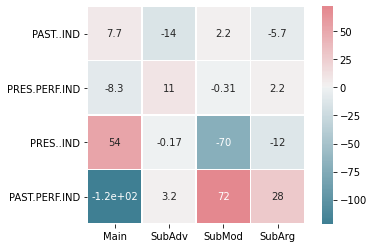

In [33]:
cl_dep = Analyze(eng_df, index='esv_TAM', columns='clause_rela')

cl_dep.show()

## Dependency with x

counts:


clause_rela   Main       SubMod SubAdv Main SubArg SubAdv     SubMod    SubArg
cltype_simp      x    Wx      x      x    Ø      x     Wx   Ø      Ø Wx      Ø
esv_TAM                                                                       
PAST..IND      934  1178    723    544  522    103     54  22     31  4      1
PRES.PERF.IND  622   235    376    464  453    102     46  36     16  1      3
PRES..IND      870   184     97    316  497     26     34  24     14  0      0
PAST.PERF.IND   71    89    331    159    7     95     20   2      5  3      0


proportions 1:


None


proportions 2:


None


Fisher's test with log transform:


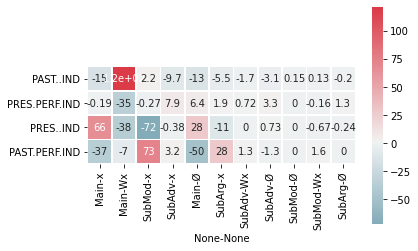

In [51]:
depwx = Analyze(eng_df, index='esv_TAM', columns=['clause_rela', 'cltype_simp'])

depwx.show()

## Dependency with particles (x)

In [34]:
depx = Analyze(eng_df, index='esv_TAM', columns=['clause_rela', 'prec_part'])

In [35]:
depx.ct

clause_rela   Main SubMod Main SubAdv Main  ...                                            
prec_part        Ø  _>CR_  _W_   _KJ_ _KH_  ... _NGD[_ _NKH[_ _PQD[_ _PRR=[_ _W_>T_W_>T_>T_
esv_TAM                                     ...                                            
PAST..IND      720    713  765    231   10  ...      1      0      0       0              1
PRES.PERF.IND  698    358  182    305    0  ...      0      1      1       0              0
PRES..IND      729     86  145    173  389  ...      0      0      0       1              0
PAST.PERF.IND   23    319   68     72    0  ...      0      0      0       0              0

[4 rows x 584 columns]

In [52]:
depx.ct.size

2336

In [36]:
max_highlighter(depx.pr)

In [37]:
max_highlighter(depx.pr2.head(25))

Let's get a narrower set that can be plotted with a heatmap.

**We thus aim to select the top of the group, the most common 
categories.**

In [38]:
depx_sum_ct = depx.ct.sum().sort_values(ascending=False).head(20)

depx_sum_ct

clause_rela  prec_part
Main         Ø            2170
SubMod       _>CR_        1476
Main         _W_          1160
SubAdv       _KJ_          781
Main         _KH_          399
SubAdv       _K_>CR_       255
SubArg       _KJ_          162
Main         _W_>T_        139
             _B_           137
             _W_B_          78
SubMod       Ø              73
Main         _W_W_          62
             _W_L_          59
SubAdv       _>M_           57
SubArg       _>CR_          57
SubAdv       _KJ_KH_        57
             Ø              57
Main         _MN_           56
             _W_GM_         53
             _H=_           53
dtype: int64

In [39]:
top_depx = depx_sum_ct[depx_sum_ct > 100]
bottom_depx = depx_sum_ct[depx_sum_ct < 100]

top_depx.sum()

6679

In [40]:
bottom_depx.sum()

662

In [41]:
# % represented in our sample: 

top_depx.sum() / depx_sum_ct.sum()

0.9098215501975208

This selection accounts for 90% of the whole qatal sample with ESV.

**Now plot heatmap...**

In [42]:
depx_top_fish = depx.fish.loc[:, top_depx.index]

depx_top_fish

clause_rela         Main     SubMod       Main     SubAdv  ...                SubArg       Main          
prec_part              Ø      _>CR_        _W_       _KJ_  ...    _K_>CR_       _KJ_     _W_>T_       _B_
PAST..IND     -31.852107   3.263263  56.405676 -17.542158  ...  11.630952  -4.701206  20.187601  2.510896
PRES.PERF.IND  15.919845  -0.463731 -16.160834  18.089518  ...  -5.148258   0.067849  -5.563086 -0.257822
PRES..IND      44.903738 -74.976016 -18.261497  -0.000000  ... -18.501307  -6.133269  -7.386694 -0.167856
PAST.PERF.IND -61.345718  69.242650  -3.175744   0.419113  ...   5.816052  26.421295  -1.884279 -4.884809

[4 rows x 9 columns]

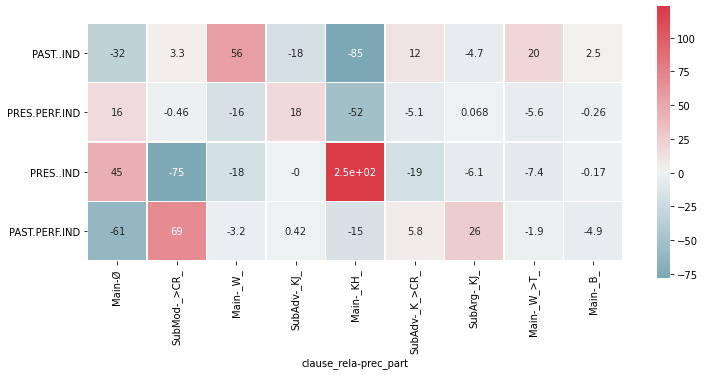

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))
heatmap(depx_top_fish, ax=ax, robust=True)

In [44]:
for tam in depx_top_fish.index:
    print(tam)
    display(depx_top_fish.loc[tam].sort_values(ascending=False).head(5))
    print()

PAST..IND


clause_rela  prec_part
Main         _W_          56.405676
             _W_>T_       20.187601
SubAdv       _K_>CR_      11.630952
SubMod       _>CR_         3.263263
Main         _B_           2.510896
Name: PAST..IND, dtype: float64


PRES.PERF.IND


clause_rela  prec_part
SubAdv       _KJ_         18.089518
Main         Ø            15.919845
SubArg       _KJ_          0.067849
Main         _B_          -0.257822
SubMod       _>CR_        -0.463731
Name: PRES.PERF.IND, dtype: float64


PRES..IND


clause_rela  prec_part
Main         _KH_         249.664675
             Ø             44.903738
SubAdv       _KJ_          -0.000000
Main         _B_           -0.167856
SubArg       _KJ_          -6.133269
Name: PRES..IND, dtype: float64


PAST.PERF.IND


clause_rela  prec_part
SubMod       _>CR_        69.242650
SubArg       _KJ_         26.421295
SubAdv       _K_>CR_       5.816052
             _KJ_          0.419113
Main         _W_>T_       -1.884279
Name: PAST.PERF.IND, dtype: float64

Let's retrieve some examples.

In [45]:
significant_sum = 0

for tam in depx_top_fish.index:
    
    assocs = depx_top_fish.loc[tam]
    top_assocs = assocs[assocs > 10]
    
    for context, value in top_assocs.iteritems():
        cl_dep, prec_part = context
        data_df = eng_df[
            (eng_df.esv_TAM == tam)
            & (eng_df.clause_rela == cl_dep)
            & (eng_df.prec_part == prec_part)
        ]
        display(HTML(f'<h3>{tam} with {cl_dep} {prec_part}</h3>'))
        display(HTML(f'<b>log-Fishers: {round(value, 4)}</b>'))
        print()
        display(ts.show(data_df, spread=15))
        
        # track how many examples have been sampled
        # i.e. how many combinations are significant statistically
        significant_sum += data_df.shape[0]


showing 15 of 765


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
15,Genesis 1:2,הָיְתָ֥ה,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ,was,PAST..IND
198858,2_Kings 6:32,אָמַ֣ר,וְה֣וּא׀ אָמַ֣ר אֶל־הַזְּקֵנִ֗ים,said,PAST..IND
397250,1_Chronicles 11:13,נֶאֱסְפוּ,וְהַפְּלִשְׁתִּים֙ נֶאֱסְפוּ־שָׁ֣ם לַמִּלְחָמָ֔ה,were,PAST..IND
399588,1_Chronicles 15:29,נִשְׁקְפָ֣ה,וּמִיכַ֨ל בַּת־שָׁא֜וּל נִשְׁקְפָ֣ה׀ בְּעַ֣ד הַחַלֹּ֗ון,looked,PAST..IND
172204,2_Samuel 19:10,מִלְּטָ֨נוּ֙,וְה֤וּא מִלְּטָ֨נוּ֙ מִכַּ֣ף פְּלִשְׁתִּ֔ים,saved,PAST..IND
10231,Genesis 22:1,נִסָּ֖ה,וְהָ֣אֱלֹהִ֔ים נִסָּ֖ה אֶת־אַבְרָהָ֑ם,tested,PAST..IND
406732,1_Chronicles 29:26,מָלַ֖ךְ,וְדָוִיד֙ בֶּן־יִשָׁ֔י מָלַ֖ךְ עַל־כָּל־יִשְׂרָאֵֽל׃,reigned,PAST..IND
277938,Ezekiel 27:9,הָ֣יוּ,זִקְנֵ֨י גְבַ֤ל וַחֲכָמֶ֨יהָ֙ הָ֣יוּ בָ֔ךְ מַחֲזִיקֵ֖י בִּדְקֵ֑ךְ,were,PAST..IND
378308,Ezra 1:6,חִזְּק֣וּ,וְכָל־סְבִיבֹֽתֵיהֶם֙ חִזְּק֣וּ בִֽידֵיהֶ֔ם בִּכְלֵי־כֶ֧סֶף בַּזָּהָ֛ב בָּרְכ֥וּשׁ וּבַבְּהֵמָ֖ה וּבַמִּגְדָּנֹ֑ות לְבַ֖ד עַל־כָּל־הִתְנַדֵּֽב׃ ס,aided,PAST..IND



showing 15 of 168


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
262206,Jeremiah 50:18,פָּקַ֖דְתִּי,הִנְנִ֥י פֹקֵ֛ד אֶל־מֶ֥לֶךְ בָּבֶ֖ל וְאֶל־אַרְצֹ֑ו כַּאֲשֶׁ֥ר פָּקַ֖דְתִּי אֶל־מֶ֥לֶךְ אַשּֽׁוּר׃,punished,PAST..IND
35430,Exodus 12:32,דִּבַּרְתֶּ֖ם,גַּם־צֹאנְכֶ֨ם גַּם־בְּקַרְכֶ֥ם קְח֛וּ כַּאֲשֶׁ֥ר דִּבַּרְתֶּ֖ם,said,PAST..IND
5697,Genesis 12:11,הִקְרִ֖יב,וַיְהִ֕י כַּאֲשֶׁ֥ר הִקְרִ֖יב לָבֹ֣וא מִצְרָ֑יְמָה,was,PAST..IND
107654,Deuteronomy 26:19,דִּבֵּֽר,וַֽיהוָ֞ה הֶאֱמִֽירְךָ֣ הַיֹּ֗ום לִהְיֹ֥ות לֹו֙ לְעַ֣ם סְגֻלָּ֔ה כַּאֲשֶׁ֖ר דִּבֶּר־לָ֑ךְ וְלִשְׁמֹ֖ר כָּל־מִצְוֹתָֽיו׃ וּֽלְתִתְּךָ֣ עֶלְיֹ֗ון עַ֤ל כָּל־הַגֹּויִם֙ אֲשֶׁ֣ר עָשָׂ֔ה לִתְהִלָּ֖ה וּלְשֵׁ֣ם וּלְתִפְאָ֑רֶת וְלִֽהְיֹתְךָ֧ עַם־קָדֹ֛שׁ לַיהוָ֥ה אֱלֹהֶ֖יךָ כַּאֲשֶׁ֥ר דִּבֵּֽר׃ ס,promised,PAST..IND
110737,Deuteronomy 31:4,עָשָׂ֗ה,וְעָשָׂ֤ה יְהוָה֙ לָהֶ֔ם כַּאֲשֶׁ֣ר עָשָׂ֗ה לְסִיחֹ֥ון וּלְעֹ֛וג מַלְכֵ֥י הָאֱמֹרִ֖י וּלְאַרְצָ֑ם אֲשֶׁ֥ר הִשְׁמִ֖יד אֹתָֽם׃,did,PAST..IND
79969,Numbers 15:36,צִוָּ֥ה,וַיִּרְגְּמ֥וּ אֹתֹ֛ו בָּאֲבָנִ֖ים כַּאֲשֶׁ֛ר צִוָּ֥ה יְהוָ֖ה אֶת־מֹשֶֽׁה׃ פ,commanded,PAST..IND
409154,2_Chronicles 6:10,דִּבֶּ֣ר,וָאֵשֵׁ֣ב׀ עַל־כִּסֵּ֣א יִשְׂרָאֵ֗ל כַּאֲשֶׁר֙ דִּבֶּ֣ר יְהוָ֔ה,promised,PAST..IND
182482,1_Kings 8:20,דִּבֶּ֣ר,וָאֵשֵׁ֣ב עַל־כִּסֵּ֣א יִשְׂרָאֵ֗ל כַּֽאֲשֶׁר֙ דִּבֶּ֣ר יְהוָ֔ה,promised,PAST..IND
283320,Ezekiel 37:7,צֻוֵּ֑יתִי,וְנִבֵּ֖אתִי כַּאֲשֶׁ֣ר צֻוֵּ֑יתִי,was,PAST..IND



showing 15 of 115


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
426134,2_Chronicles 36:4,לָקַ֣ח,וְאֶת־יֹואָחָ֤ז אָחִיו֙ לָקַ֣ח נְכֹ֔ו,took,PAST..IND
134086,Judges 9:57,הֵשִׁ֥יב,וְאֵ֗ת כָּל־רָעַת֙ אַנְשֵׁ֣י שְׁכֶ֔ם הֵשִׁ֥יב אֱלֹהִ֖ים בְּרֹאשָׁ֑ם,made,PAST..IND
367304,Esther 4:8,נָ֣תַן,וְאֶת־פַּתְשֶׁ֣גֶן כְּתָֽב־הַ֠דָּת אֲשֶׁר־נִתַּ֨ן בְּשׁוּשָׁ֤ן לְהַשְׁמִידָם֙ נָ֣תַן לֹ֔ו לְהַרְאֹ֥ות אֶת־אֶסְתֵּ֖ר וּלְהַגִּ֣יד לָ֑הּ וּלְצַוֹּ֣ות עָלֶ֗יהָ לָבֹ֨וא אֶל־הַמֶּ֧לֶךְ לְהִֽתְחַנֶּן־לֹ֛ו וּלְבַקֵּ֥שׁ מִלְּפָנָ֖יו עַל־עַמָּֽהּ׃,gave,PAST..IND
8653,Genesis 19:11,הִכּוּ֙,וְֽאֶת־הָאֲנָשִׁ֞ים אֲשֶׁר־פֶּ֣תַח הַבַּ֗יִת הִכּוּ֙ בַּסַּנְוֵרִ֔ים מִקָּטֹ֖ן וְעַד־גָּדֹ֑ול,struck,PAST..IND
273765,Ezekiel 20:11,הֹודַ֣עְתִּי,וְאֶת־מִשְׁפָּטַ֖י הֹודַ֣עְתִּי אֹותָ֑ם אֲשֶׁ֨ר יַעֲשֶׂ֥ה אֹותָ֛ם הָאָדָ֖ם וָחַ֥י בָּהֶֽם׃,made,PAST..IND
210155,2_Kings 23:11,שָׂרַ֥ף,וְאֶת־מַרְכְּבֹ֥ות הַשֶּׁ֖מֶשׁ שָׂרַ֥ף בָּאֵֽשׁ׃,burned,PAST..IND
407835,2_Chronicles 3:5,חִפָּה֙,וְאֵ֣ת׀ הַבַּ֣יִת הַגָּדֹ֗ול חִפָּה֙ עֵ֣ץ בְּרֹושִׁ֔ים,lined,PAST..IND
180691,1_Kings 6:30,צִפָּ֣ה,וְאֶת־קַרְקַ֥ע הַבַּ֖יִת צִפָּ֣ה זָהָ֑ב לִפְנִ֖ימָה וְלַחִיצֹֽון׃,overlaid,PAST..IND
117529,Joshua 8:29,תָּלָ֥ה,וְאֶת־מֶ֧לֶךְ הָעַ֛י תָּלָ֥ה עַל־הָעֵ֖ץ עַד־עֵ֣ת הָעָ֑רֶב,hanged,PAST..IND



showing 15 of 698


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
229402,Isaiah 49:14,עֲזָבַ֣נִי,עֲזָבַ֣נִי יְהוָ֑ה,has forsaken,PRES.PERF.IND
297616,Amos 8:7,נִשְׁבַּ֥ע,נִשְׁבַּ֥ע יְהוָ֖ה בִּגְאֹ֣ון יַעֲקֹ֑ב,has sworn,PRES.PERF.IND
364316,Lamentations 2:17,עָשָׂ֨ה,עָשָׂ֨ה יְהוָ֜ה אֲשֶׁ֣ר זָמָ֗ם,has done,PRES.PERF.IND
267212,Ezekiel 7:6,בָּ֔א,קֵ֣ץ בָּ֔א,has come,PRES.PERF.IND
269922,Ezekiel 13:5,עֲלִיתֶם֙,לֹ֤א עֲלִיתֶם֙ בַּפְּרָצֹ֔ות,have not gone,PRES.PERF.IND
240556,Jeremiah 11:10,הֵפֵ֤רוּ,הֵפֵ֤רוּ בֵֽית־יִשְׂרָאֵל֙ וּבֵ֣ית יְהוּדָ֔ה אֶת־בְּרִיתִ֕י אֲשֶׁ֥ר כָּרַ֖תִּי אֶת־אֲבֹותָֽם׃ ס,have broken,PRES.PERF.IND
13939,Genesis 27:19,עָשִׂ֕יתִי,עָשִׂ֕יתִי כַּאֲשֶׁ֥ר דִּבַּ֖רְתָּ אֵלָ֑י,have done,PRES.PERF.IND
147436,1_Samuel 12:10,חָטָ֔אנוּ,חָטָ֔אנוּ,have sinned,PRES.PERF.IND
215320,Isaiah 9:9,גֻּדָּ֔עוּ,שִׁקְמִ֣ים גֻּדָּ֔עוּ,have been,PRES.PERF.IND



showing 15 of 305


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
131140,Judges 6:30,נָתַץ֙,כִּ֤י נָתַץ֙ אֶת־מִזְבַּ֣ח הַבַּ֔עַל,has broken,PRES.PERF.IND
199546,2_Kings 8:1,קָרָ֤א,כִּֽי־קָרָ֤א יְהוָה֙ לָֽרָעָ֔ב,has called,PRES.PERF.IND
37420,Exodus 16:3,הֹוצֵאתֶ֤ם,כִּֽי־הֹוצֵאתֶ֤ם אֹתָ֨נוּ֙ אֶל־הַמִּדְבָּ֣ר הַזֶּ֔ה לְהָמִ֛ית אֶת־כָּל־הַקָּהָ֥ל הַזֶּ֖ה בָּרָעָֽב׃ ס,have brought,PRES.PERF.IND
7239,Genesis 16:11,שָׁמַ֥ע,כִּֽי־שָׁמַ֥ע יְהוָ֖ה אֶל־עָנְיֵֽךְ׃,has listened,PRES.PERF.IND
238191,Jeremiah 6:30,מָאַ֥ס,כִּֽי־מָאַ֥ס יְהוָ֖ה בָּהֶֽם׃ פ,has rejected,PRES.PERF.IND
307473,Zechariah 8:23,שָׁמַ֖עְנוּ,כִּ֥י שָׁמַ֖עְנוּ אֱלֹהִ֥ים עִמָּכֶֽם׃ ס,have heard,PRES.PERF.IND
145791,1_Samuel 9:12,בָּ֣א,כִּ֤י הַיֹּום֙ בָּ֣א לָעִ֔יר,has come,PRES.PERF.IND
311253,Psalms 6:9,שָׁמַ֥ע,כִּֽי־שָׁמַ֥ע יְ֝הוָ֗ה קֹ֣ול בִּכְיִֽי׃ שָׁמַ֣ע יְ֭הוָה תְּחִנָּתִ֑י יְ֝הוָ֗ה תְּֽפִלָּתִ֥י יִקָּֽח׃,has heard,PRES.PERF.IND
18274,Genesis 33:11,חַנַּ֥נִי,כִּֽי־חַנַּ֥נִי אֱלֹהִ֖ים,has dealt,PRES.PERF.IND



showing 15 of 729


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
360488,Ecclesiastes 3:20,הָיָ֣ה,הַכֹּל֙ הָיָ֣ה מִן־הֶֽעָפָ֔ר,are,PRES..IND
166809,2_Samuel 12:18,מֵ֥ת,מֵ֥ת הַיֶּ֖לֶד,is,PRES..IND
332172,Psalms 119:112,נָטִ֣יתִי,נָטִ֣יתִי לִ֭בִּי לַעֲשֹׂ֥ות חֻקֶּ֗יךָ לְעֹולָ֥ם עֵֽקֶב׃,incline,PRES..IND
137553,Judges 16:15,אֲהַבְתִּ֔יךְ,אֲהַבְתִּ֔יךְ,love,PRES..IND
9097,Genesis 19:31,זָקֵ֑ן,אָבִ֣ינוּ זָקֵ֑ן,is,PRES..IND
339414,Job 13:18,יָ֝דַ֗עְתִּי,יָ֝דַ֗עְתִּי כִּֽי־אֲנִ֥י אֶצְדָּֽק׃,know,PRES..IND
341956,Job 24:5,יָצְא֣וּ,יָצְא֣וּ בְּ֭פָעֳלָם,go,PRES..IND
343221,Job 30:13,נָתְס֗וּ,נָתְס֗וּ נְֽתִיבָ֫תִ֥י,break,PRES..IND
312575,Psalms 17:10,סָּגְר֑וּ,חֶלְבָּ֥מֹו סָּגְר֑וּ,close,PRES..IND



showing 15 of 389


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
262191,Jeremiah 50:18,אָמַ֞ר,כֹּֽה־אָמַ֞ר יְהוָ֤ה צְבָאֹות֙ אֱלֹהֵ֣י יִשְׂרָאֵ֔ל,says,PRES..IND
297477,Amos 7:17,אָמַ֣ר,כֹּה־אָמַ֣ר יְהוָ֗ה,says,PRES..IND
269128,Ezekiel 11:16,אָמַר֮,כֹּֽה־אָמַר֮ אֲדֹנָ֣י יְהוִה֒,says,PRES..IND
304206,Haggai 1:5,אָמַ֖ר,כֹּ֥ה אָמַ֖ר יְהוָ֣ה צְבָאֹ֑ות,says,PRES..IND
240780,Jeremiah 11:21,אָמַ֤ר,כֹּֽה־אָמַ֤ר יְהוָה֙ עַל־אַנְשֵׁ֣י עֲנָתֹ֔ות הַֽמְבַקְשִׁ֥ים אֶֽת־נַפְשְׁךָ֖ לֵאמֹ֑ר,says,PRES..IND
274641,Ezekiel 21:8,אָמַ֣ר,כֹּ֚ה אָמַ֣ר יְהוָ֔ה,says,PRES..IND
244126,Jeremiah 19:1,אָמַ֣ר,כֹּ֚ה אָמַ֣ר יְהוָ֔ה,says,PRES..IND
278770,Ezekiel 28:25,אָמַר֮,כֹּֽה־אָמַר֮ אֲדֹנָ֣י יְהוִה֒,says,PRES..IND
248308,Jeremiah 26:18,אָמַ֣ר,כֹּֽה־אָמַ֣ר׀ יְהוָ֣ה צְבָאֹ֗ות,says,PRES..IND



showing 15 of 319


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
196840,2_Kings 4:17,דִּבֶּ֥ר,וַתֵּ֣לֶד בֵּ֑ן לַמֹּועֵ֤ד הַזֶּה֙ כָּעֵ֣ת חַיָּ֔ה אֲשֶׁר־דִּבֶּ֥ר אֵלֶ֖יהָ אֱלִישָֽׁע׃,had said,PAST.PERF.IND
35539,Exodus 12:39,הֹוצִ֧יאוּ,וַיֹּאפ֨וּ אֶת־הַבָּצֵ֜ק אֲשֶׁ֨ר הֹוצִ֧יאוּ מִמִּצְרַ֛יִם עֻגֹ֥ת מַצֹּ֖ות,had brought,PAST.PERF.IND
5927,Genesis 13:4,עָ֥שָׂה,וַיֵּ֨לֶךְ֙ לְמַסָּעָ֔יו מִנֶּ֖גֶב וְעַד־בֵּֽית־אֵ֑ל עַד־הַמָּקֹ֗ום אֲשֶׁר־הָ֨יָה שָׁ֤ם אָֽהֳלֹו֙ בַּתְּחִלָּ֔ה בֵּ֥ין בֵּֽית־אֵ֖ל וּבֵ֥ין הָעָֽי׃ אֶל־מְקֹום֙ הַמִּזְבֵּ֔חַ אֲשֶׁר־עָ֥שָׂה שָׁ֖ם בָּרִאשֹׁנָ֑ה,had made,PAST.PERF.IND
368660,Esther 8:2,הֶֽעֱבִיר֙,וַיָּ֨סַר הַמֶּ֜לֶךְ אֶת־טַבַּעְתֹּ֗ו אֲשֶׁ֤ר הֶֽעֱבִיר֙ מֵֽהָמָ֔ן,had taken,PAST.PERF.IND
370332,Daniel 1:11,מִנָּה֙,וַיֹּ֥אמֶר דָּנִיֵּ֖אל אֶל־הַמֶּלְצַ֑ר אֲשֶׁ֤ר מִנָּה֙ שַׂ֣ר הַסָּֽרִיסִ֔ים עַל־דָּנִיֵּ֣אל חֲנַנְיָ֔ה מִֽישָׁאֵ֖ל וַעֲזַרְיָֽה׃,had assigned,PAST.PERF.IND
78363,Numbers 13:32,תָּר֣וּ,וַיֹּוצִ֜יאוּ דִּבַּ֤ת הָאָ֨רֶץ֙ אֲשֶׁ֣ר תָּר֣וּ אֹתָ֔הּ אֶל־בְּנֵ֥י יִשְׂרָאֵ֖ל לֵאמֹ֑ר,had spied,PAST.PERF.IND
210963,2_Kings 24:3,עָשָֽׂה,אַ֣ךְ׀ עַל־פִּ֣י יְהוָ֗ה הָֽיְתָה֙ בִּֽיהוּדָ֔ה לְהָסִ֖יר מֵעַ֣ל פָּנָ֑יו בְּחַטֹּ֣את מְנַשֶּׁ֔ה כְּכֹ֖ל אֲשֶׁ֥ר עָשָֽׂה׃,had done,PAST.PERF.IND
49030,Exodus 35:29,צִוָּ֧ה,כָּל־אִ֣ישׁ וְאִשָּׁ֗ה אֲשֶׁ֨ר נָדַ֣ב לִבָּם֮ אֹתָם֒ לְהָבִיא֙ לְכָל־הַמְּלָאכָ֔ה אֲשֶׁ֨ר צִוָּ֧ה יְהוָ֛ה לַעֲשֹׂ֖ות בְּיַד־מֹשֶׁ֑ה הֵבִ֧יאוּ בְנֵי־יִשְׂרָאֵ֛ל נְדָבָ֖ה לַיהוָֽה׃ פ,had commanded,PAST.PERF.IND
248014,Jeremiah 26:8,צִוָּ֣ה,וַיְהִ֣י׀ כְּכַלֹּ֣ות יִרְמְיָ֗הוּ לְדַבֵּר֙ אֵ֣ת כָּל־אֲשֶׁר־צִוָּ֣ה יְהוָ֔ה לְדַבֵּ֖ר אֶל־כָּל־הָעָ֑ם,had commanded,PAST.PERF.IND



showing 15 of 63


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
164769,2_Samuel 8:9,הִכָּ֣ה,וַיִּשְׁמַ֕ע תֹּ֖עִי מֶ֣לֶךְ חֲמָ֑ת כִּ֚י הִכָּ֣ה דָוִ֔ד אֵ֖ת כָּל־חֵ֥יל הֲדַדְעָֽזֶר׃,had defeated,PAST.PERF.IND
165683,2_Samuel 10:19,נִגְּפוּ֙,וַיִּרְא֨וּ כָֽל־הַמְּלָכִ֜ים עַבְדֵ֣י הֲדַדְעֶ֗זֶר כִּ֤י נִגְּפוּ֙ לִפְנֵ֣י יִשְׂרָאֵ֔ל,had been,PAST.PERF.IND
398790,1_Chronicles 14:2,הֱכִינֹ֧ו,וַיֵּ֣דַע דָּוִ֔יד כִּֽי־הֱכִינֹ֧ו יְהוָ֛ה לְמֶ֖לֶךְ עַל־יִשְׂרָאֵ֑ל,had established,PAST.PERF.IND
137709,Judges 16:20,סָ֥ר,וְהוּא֙ לֹ֣א יָדַ֔ע כִּ֥י יְהוָ֖ה סָ֥ר מֵעָלָֽיו׃,had left,PAST.PERF.IND
401569,1_Chronicles 19:19,נִגְּפוּ֙,וַיִּרְא֞וּ עַבְדֵ֣י הֲדַדְעֶ֗זֶר כִּ֤י נִגְּפוּ֙ לִפְנֵ֣י יִשְׂרָאֵ֔ל,had been,PAST.PERF.IND
111839,Deuteronomy 32:30,מְכָרָ֔ם,אִם־לֹא֙ כִּי־צוּרָ֣ם מְכָרָ֔ם וַֽיהוָ֖ה הִסְגִּירָֽם׃,had sold,PAST.PERF.IND
14597,Genesis 28:6,בֵרַ֣ךְ,וַיַּ֣רְא עֵשָׂ֗ו כִּֽי־בֵרַ֣ךְ יִצְחָק֮ אֶֽת־יַעֲקֹב֒ וְשִׁלַּ֤ח אֹתֹו֙ פַּדֶּ֣נָֽה אֲרָ֔ם לָקַֽחַת־לֹ֥ו מִשָּׁ֖ם אִשָּׁ֑ה בְּבָרֲכֹ֣ו אֹתֹ֔ו,had blessed,PAST.PERF.IND
16774,Genesis 31:22,בָרַ֖ח,וַיֻּגַּ֥ד לְלָבָ֖ן בַּיֹּ֣ום הַשְּׁלִישִׁ֑י כִּ֥י בָרַ֖ח יַעֲקֹֽב׃,had fled,PAST.PERF.IND
117344,Joshua 8:21,לָכַ֤ד,וִיהֹושֻׁ֨עַ וְכָֽל־יִשְׂרָאֵ֜ל רָא֗וּ כִּֽי־לָכַ֤ד הָֽאֹרֵב֙ אֶת־הָעִ֔יר וְכִ֥י עָלָ֖ה עֲשַׁ֣ן הָעִ֑יר,had captured,PAST.PERF.IND


Number of significant combinations:

In [46]:
significant_sum

3551

In [47]:
# now proportion:

significant_sum / eng_df.shape[0]

0.3812540261971226